In [1]:
using BSON: @save, @load
using Statistics, DelimitedFiles, Printf
include("../MDToolbox.jl/src/MDToolbox.jl")
using .MDToolbox
using StatsBase 

In [2]:
qs = readdlm("data/quaternion/QUATERNION_LIST_576_Orient")
models = readpdb("data/t1r/cluster.pdb")
nmodel = size(models, 1)
nframe = 100
nq = size(qs, 1)
test_radius = 30
pred_radius = 20
sigma_noise = 3.0

3.0

In [4]:
using Plots

┌ Info: Saved animation to 
│   fn = /data/seica/afm_hmm/afm_input_iq_34.gif
└ @ Plots /opt/julia_depot/packages/Plots/SIQaY/src/animation.jl:104


Plots.AnimatedGif("/data/seica/afm_hmm/afm_input_iq_34.gif")
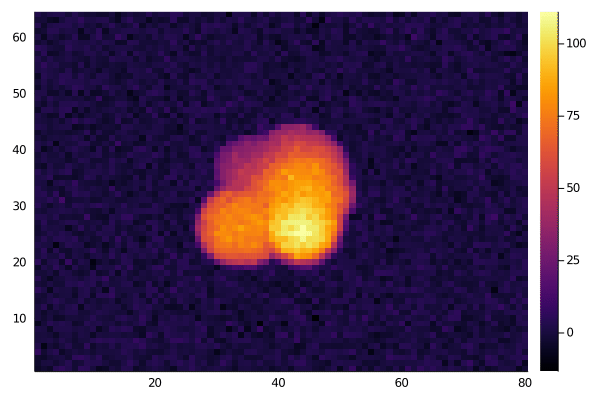

In [6]:
quate = 34
@load "data/01_test_case/radius_$(test_radius)/iq_$(quate)_noise_$(sigma_noise)_nframe_$(nframe).bson" models afms qs param imodel_array iq_array dxdy_array sigma_noise probe_radius T pi_i T_rot

anim = @animate for i = 1:nframe
    heatmap(afms[i])
end
gif(anim, "afm_input_iq_$(quate).gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /data/seica/afm_hmm/afm_output_iq_34.gif
└ @ Plots /opt/julia_depot/packages/Plots/SIQaY/src/animation.jl:104


Plots.AnimatedGif("/data/seica/afm_hmm/afm_output_iq_34.gif")
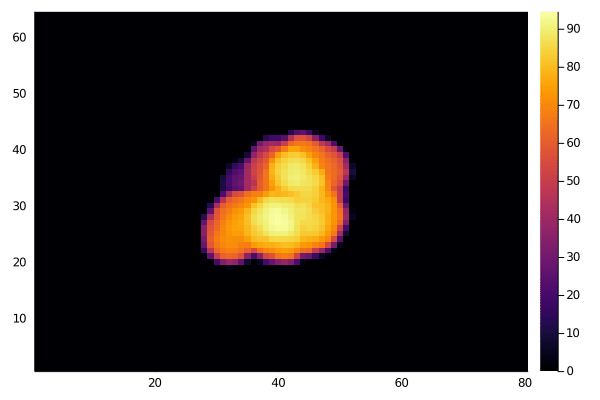

In [15]:
@load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/iq_$(quate)_nframe_$(nframe).bson" params r

afm_result = []
for iframe = 1:nframe
    max_id = argmax(r.all[iframe])
    model = models[max_id[1], :]
    q = qs[max_id[2], :]
    model = MDToolbox.rotate(model, q)
    afm = afmize(model, params[1])
    push!(afm_result, afm)
end

anim = @animate for i = 1:nframe
    heatmap(afm_result[i])
end
gif(anim, "afm_output_iq_$(quate).gif", fps = 10)

In [14]:
params[1].probeRadius

20.0